## Trial to use Convolutional Neural Network (with Tensorflow) to detect variogram plot that implies stationary time series

### Load and preprocess plot images

#### Based on tutorial: https://www.tensorflow.org/tutorials/load_data/images

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [25]:
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.9.1'

##### In order to get the format of data_dir (from example)

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)

In [4]:
data_dir

'/Users/tadatoshi/.keras/datasets/flower_photos'

##### So, it's just a string with absolute path

In [8]:
os.path.realpath('.')

'/Users/tadatoshi/Documents/development/projects/tadatoshi_solar_research_society/time_series_plot_auto_analysis/notebooks'

##### It seems that image label is based on the directory name that contains images. 
##### Thus, I will create two directory, "stationary" and "nonstationary" and place the corresponding plots under them manually. 

In [11]:
plots_data_dir = os.path.abspath(os.path.join(os.path.realpath('.'), '../plots/synthetic_variograms'))

In [12]:
plots_data_dir

'/Users/tadatoshi/Documents/development/projects/tadatoshi_solar_research_society/time_series_plot_auto_analysis/plots/synthetic_variograms'

##### Get image size

##### Based on https://note.nkmk.me/en/python-opencv-pillow-image-size/

In [14]:
import cv2

In [16]:
image_1 = cv2.imread(os.path.join(plots_data_dir, 'stationary/synthetic_variogram_20220629150855_3.png'))

In [18]:
type(image_1)

numpy.ndarray

In [19]:
image_1.shape

(288, 432, 3)

### Create a dataset

In [21]:
batch_size = 32
img_height = 288
img_width = 432

In [22]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  plots_data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 2 classes.
Using 80 files for training.


2022-06-29 16:15:19.276262: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  plots_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 2 classes.
Using 20 files for validation.


In [24]:
class_names = train_ds.class_names
class_names

['nonstationary', 'stationary']

### Visualize the data

#### First 9 images from the training dataset

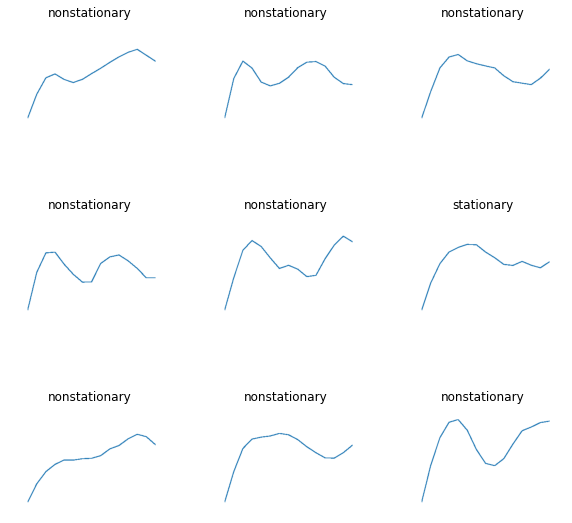

In [26]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [27]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 288, 432, 3)
(32,)
